# COVID-19 Data Analysis Project  

**Author:** [Your Name]  
**Date:** [Today’s Date]  
**Dataset Sources:**  
- Johns Hopkins University (COVID-19 time series and cleaned data)  
- Worldometer (population, testing, and snapshot data)  
- USA county-level COVID-19 dataset  

---

## Problem Statement  
The COVID-19 pandemic has significantly impacted all countries worldwide, creating urgent needs for monitoring, analysis, and decision-making.  
The purpose of this project is to:  
1. Analyze the spread and impact of COVID-19 globally and by country.  
2. Identify the top affected countries in terms of confirmed cases, deaths, and active cases.  
3. Track the evolution of COVID-19 cases over time.  
4. Provide meaningful visualizations and insights that can help understand the pandemic trends.  
5. Build an interactive dashboard to allow users to explore the data dynamically.  

---

## Project Steps  
1. **Data Quality Check**: Inspect datasets, identify missing values, and verify data consistency.  
2. **Data Cleaning & Wrangling**: Handle missing values, convert date formats, and aggregate where needed.  
3. **Exploratory Data Analysis (EDA)**: Generate visualizations to understand trends, distributions, and comparisons.  
4. **Business Questions**: Answer key analytical questions using the data and visualizations.  
5. **Insights & Recommendations**: Summarize findings and provide actionable insights.  
6. **Build Interactive Dashboard (Streamlit App)**:  
   - Create tabs for each dataset.  
   - Add slicers/filters (e.g., by country, date, region).  
   - Display charts and metrics dynamically.  
7. **Deployment**: Deploy the Streamlit app to a platform (Streamlit Cloud ) for public access.  

---


 # Full_group_csv 

Daily data for each country/region

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

full_grouped = pd.read_csv("full_grouped.csv")
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [3]:
print("-->Shape:", full_grouped.shape,"\n")
print("\n-->Columns:", full_grouped.columns.tolist(),"\n")
print("\n-->Data types:\n", full_grouped.dtypes,"\n")
print("\n-->Missing values:\n", full_grouped.isna().sum())

-->Shape: (35156, 10) 


-->Columns: ['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'WHO Region'] 


-->Data types:
 Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object 


-->Missing values:
 Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64


In [4]:
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'],dayfirst=True , errors='coerce')

In [5]:
full_grouped.dtypes

Date              datetime64[ns]
Country/Region            object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
New cases                  int64
New deaths                 int64
New recovered              int64
WHO Region                object
dtype: object

In [6]:
full_grouped=full_grouped.sort_values(['Country/Region','Date'])
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
187,2020-01-23,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
374,2020-01-24,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
561,2020-01-25,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
748,2020-01-26,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...
34407,2020-07-23,Zimbabwe,2124,28,510,1586,90,2,0,Africa
34594,2020-07-24,Zimbabwe,2296,32,514,1750,172,4,4,Africa
34781,2020-07-25,Zimbabwe,2434,34,518,1882,138,2,4,Africa
34968,2020-07-26,Zimbabwe,2512,34,518,1960,78,0,0,Africa


# covid_19_clean_complete

Cleaner version of the original data

In [7]:
covid_clean = pd.read_csv("covid_19_clean_complete.csv")
covid_clean.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


If the column Province/State is NaN, the data refers to the whole country
If the column Province/State is not NaN, the data refers to a specific province or state within the country

In [8]:
print("-->Shape:", covid_clean.shape,"\n")
print("-->Columns:", covid_clean.columns.tolist(),"\n")
print("\n-->Data types:\n", covid_clean.dtypes,"\n")
print("\n-->Missing values:\n", covid_clean.isna().sum())

-->Shape: (49068, 10) 

-->Columns: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region'] 


-->Data types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object 


-->Missing values:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [9]:
covid_clean['Date']= pd.to_datetime(covid_clean['Date'], dayfirst= True , errors='coerce')

In [10]:
covid_clean.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [54]:
# Grouping
global_ts = covid_clean.groupby("Date")[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()

# Q:How did global cases evolve over time

A line chart shows a sharp increase in 2020

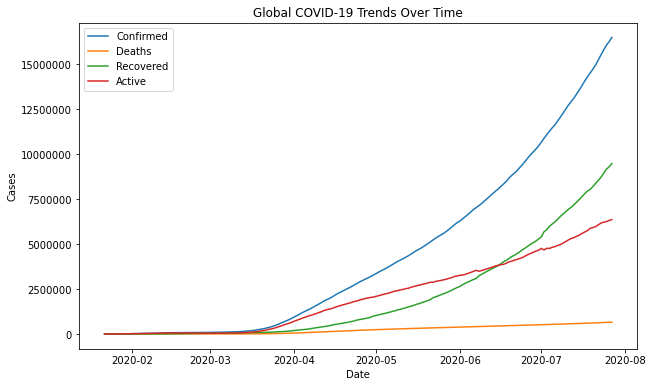

In [55]:
#Visualization of Global COVID-19 Trends Over Time
plt.figure(figsize=(10,6))
plt.plot(global_ts["Date"], global_ts["Confirmed"], label="Confirmed")
plt.plot(global_ts["Date"], global_ts["Deaths"], label="Deaths")
plt.plot(global_ts["Date"], global_ts["Recovered"], label="Recovered")
plt.plot(global_ts["Date"], global_ts["Active"], label="Active")

plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Global COVID-19 Trends Over Time")
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # Convert scientific numbers to normal numbers
plt.show()


# Q:Which countries recorded the highest confirmed cases

USA, India, Brazil..

In [57]:
# Top 10 Countries in terms of total infections
latest =covid_clean.groupby("Country/Region")[["Confirmed","Deaths","Recovered","Active"]].max().reset_index()

In [58]:
top10_confirmed = latest.sort_values("Confirmed", ascending=False).head(10)

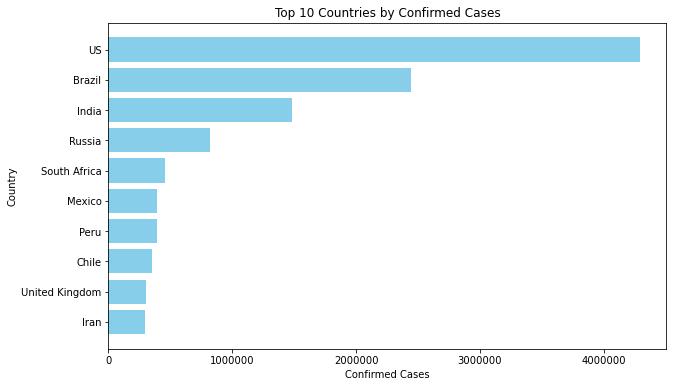

In [72]:
plt.figure(figsize=(10,6))
plt.barh(top10_confirmed["Country/Region"], top10_confirmed["Confirmed"], color="skyblue")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries by Confirmed Cases")
plt.gca().invert_yaxis()  
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# Q:Which countries recorded the highest deaths

USA, Brazil, India, Mexico..

In [61]:
top10_deaths = latest.sort_values("Deaths", ascending=False).head(10)


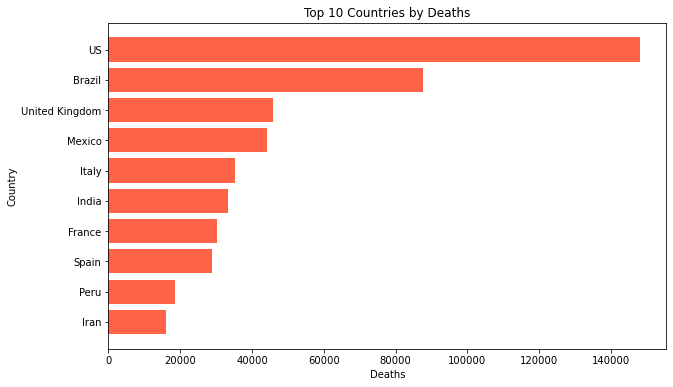

In [71]:
plt.figure(figsize=(10,6))
plt.barh(top10_deaths["Country/Region"], top10_deaths["Deaths"], color="tomato")
plt.xlabel("Deaths")
plt.ylabel("Country")
plt.title("Top 10 Countries by Deaths")
plt.gca().invert_yaxis()  # أكبر دولة تبقى فوق
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# Q:Which countries recorded the highest Active cases

In [65]:
top10_active= latest.sort_values("Active" , ascending=False).head(10)

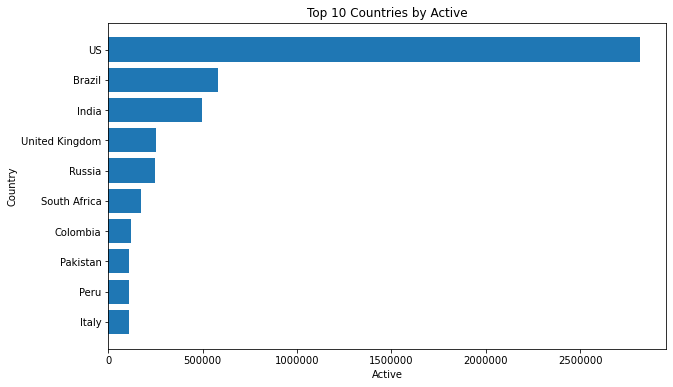

In [66]:
plt.figure(figsize=(10,6))
plt.barh(top10_active["Country/Region"] ,top10_active["Active"] )
plt.xlabel("Active")
plt.ylabel("Country")
plt.title("Top 10 Countries by Active")
plt.ticklabel_format(style='Plain' , axis='x')
plt.gca().invert_yaxis()
plt.show()

# Q:What is the relationship between confirmed COVID-19 cases and deaths across countries

The scatter plot shows a positive correlation between confirmed cases and deat
Countries with more confirmed cases generally report more deaths.

However, some countries (e.g., Mexico, Peru) appear to have a higher death rate compared to others with similar case numbers.

On the other hand, countries like India and Russia have very high confirmed cases but relatively lower deaths in comparison

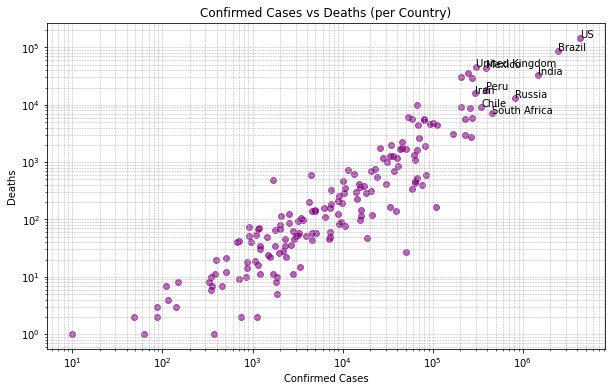

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(latest["Confirmed"], latest["Deaths"], alpha=0.6, color="purple")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.title("Confirmed Cases vs Deaths (per Country)")


for i in latest.sort_values("Confirmed", ascending=False).head(10).index:
    plt.text(latest.loc[i,"Confirmed"], latest.loc[i,"Deaths"], latest.loc[i,"Country/Region"])

    
plt.xscale("log")  # عشان القيم الكبيرة ماتغطيش على الصغيرة
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


# day_wise

global daily totals

In [11]:
day_wise = pd.read_csv("day_wise.csv")
day_wise

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [12]:
print("Shape:", day_wise.shape,'\n')
print("Columns:", day_wise.columns.tolist(),'\n')
print("\nData types:\n", day_wise.dtypes,'\n')
print("\nMissing values:\n", day_wise.isna().sum(),'\n')

Shape: (188, 12) 

Columns: ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'] 


Data types:
 Date                       object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
No. of countries            int64
dtype: object 


Missing values:
 Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countri

In [13]:
day_wise['Date']= pd.to_datetime(day_wise['Date'] , dayfirst= True, errors='coerce')

In [14]:
day_wise.dtypes

Date                      datetime64[ns]
Confirmed                          int64
Deaths                             int64
Recovered                          int64
Active                             int64
New cases                          int64
New deaths                         int64
New recovered                      int64
Deaths / 100 Cases               float64
Recovered / 100 Cases            float64
Deaths / 100 Recovered           float64
No. of countries                   int64
dtype: object

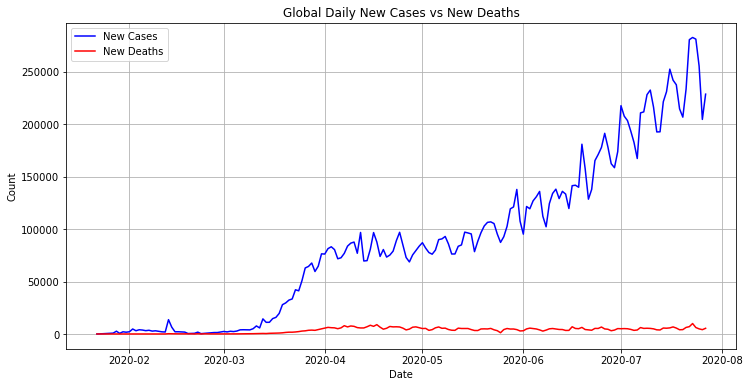

In [74]:
#New Cases and New Deaths
plt.figure(figsize=(12,6))
plt.plot(day_wise['Date'], day_wise['New cases'], label='New Cases', color='blue')
plt.plot(day_wise['Date'], day_wise['New deaths'], label='New Deaths', color='red')

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Global Daily New Cases vs New Deaths")
plt.legend()
plt.grid(True)
plt.show()


# country wise latest

snapshot  of each country (undated).

In [17]:
country_latest = pd.read_csv("country_wise_latest.csv")
country_latest

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [18]:
print("Shape:", country_latest.shape)
print("Columns:", country_latest.columns.tolist(),'\n')
print("\nData types:\n", country_latest.dtypes,'\n')
print("\nMissing values:\n", country_latest.isna().sum(),'\n')

Shape: (187, 15)
Columns: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region'] 


Data types:
 Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object 


Missing values:
 Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases        

In [95]:
country_group= country_latest.groupby('Country/Region')[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()



In [98]:
top10_cases = country_group.sort_values("Confirmed" , ascending=False).head(10)
top10_cases

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,4290259,148011,1325804,2816444
23,Brazil,2442375,87618,1846641,508116
79,India,1480073,33408,951166,495499
138,Russia,816680,13334,602249,201097
154,South Africa,452529,7067,274925,170537
111,Mexico,395489,44022,303810,47657
132,Peru,389717,18418,272547,98752
35,Chile,347923,9187,319954,18782
177,United Kingdom,301708,45844,1437,254427
81,Iran,293606,15912,255144,22550


In [99]:
top10_Deaths=country_group.sort_values('Deaths' , ascending= False).head(10)
top10_Deaths

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,4290259,148011,1325804,2816444
23,Brazil,2442375,87618,1846641,508116
177,United Kingdom,301708,45844,1437,254427
111,Mexico,395489,44022,303810,47657
85,Italy,246286,35112,198593,12581
79,India,1480073,33408,951166,495499
61,France,220352,30212,81212,108928
157,Spain,272421,28432,150376,93613
132,Peru,389717,18418,272547,98752
81,Iran,293606,15912,255144,22550


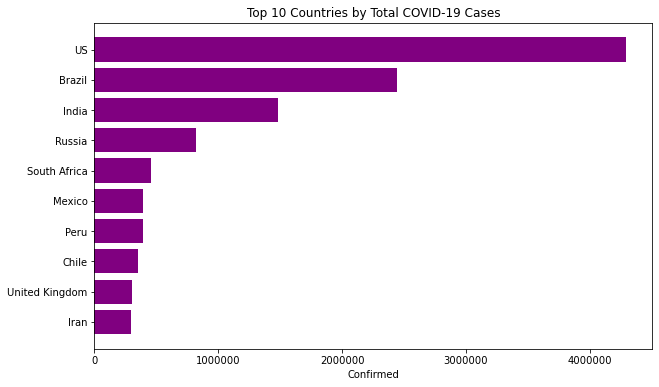

In [100]:
import matplotlib.pyplot as plt

# Top 10 Cases
plt.figure(figsize=(10,6))
plt.barh(top10_cases["Country/Region"], top10_cases["Confirmed"],color="purple")
plt.ticklabel_format(style='plain', axis='x') 
plt.xlabel("Confirmed")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.gca().invert_yaxis()
plt.show()

# worldometer_data

 Note:
 The dataset "Worldometer data" contains many missing values 
 (especially in NewCases, NewDeaths, and Testing-related columns).
 Since other datasets already provide more complete time-series data, 
 this file will not be used as a primary source. 
 It may only be referenced for additional information 
 such as Population or TotalTests if needed.


In [22]:
worldometer = pd.read_csv("worldometer_data.csv")
worldometer

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [23]:
print("Shape:", worldometer.shape,'\n')
print("Columns:", worldometer.columns.tolist(),'\n')
print("\nData types:\n", worldometer.dtypes,'\n')
print("\nMissing values:\n", worldometer.isna().sum(),'\n')

Shape: (209, 16) 

Columns: ['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region'] 


Data types:
 Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object 


Missing values:
 Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCa

# usa_county_wise

Detailed data for US states and counties only.

In [47]:
usa_county = pd.read_csv("usa_county_wise.csv")
usa_county

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0


In [48]:
print("Shape:", usa_county.shape,'\n')
print("Columns:", usa_county.columns.tolist(),'\n')
print("\nData types:\n", usa_county.dtypes,'\n')
print("\nMissing values:\n", usa_county.isna().sum(),'\n')


Shape: (627920, 14) 

Columns: ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed', 'Deaths'] 


Data types:
 UID                 int64
iso2               object
iso3               object
code3               int64
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
Date               object
Confirmed           int64
Deaths              int64
dtype: object 


Missing values:
 UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64 



In [49]:
usa_county['Date'] = pd.to_datetime(usa_county['Date'], dayfirst=False, errors='coerce')

In [50]:
usa_county.dtypes

UID                        int64
iso2                      object
iso3                      object
code3                      int64
FIPS                     float64
Admin2                    object
Province_State            object
Country_Region            object
Lat                      float64
Long_                    float64
Combined_Key              object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
dtype: object

In [51]:
tate_ts = usa_county.groupby(['Province_State','Date'])[['Confirmed','Deaths']].sum().reset_index()

In [52]:
tate_ts

,Province_State,Date,Confirmed,Deaths
0,Alabama,2020-01-22,0,0
1,Alabama,2020-01-23,0,0
2,Alabama,2020-01-24,0,0
3,Alabama,2020-01-25,0,0
4,Alabama,2020-01-26,0,0
...,...,...,...,...
10899,Wyoming,2020-07-23,2347,1
10900,Wyoming,2020-07-24,2405,1
10901,Wyoming,2020-07-25,2446,1
10902,Wyoming,2020-07-26,2475,1


# Q4: Which US states reported the highest confirmed cases overall

New York, California, Texas, Florida,..

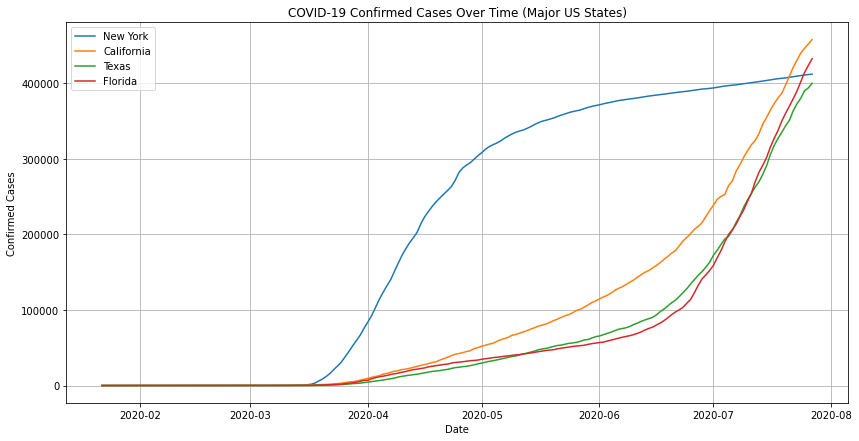

In [91]:
major_states = ["New York", "California", "Texas", "Florida"]
plt.figure(figsize=(14,7))
for state in major_states:
    subset = state_ts[state_ts['Province_State'] == state]
    plt.plot(subset['Date'], subset['Confirmed'], label=state)

plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases Over Time (Major US States)")
plt.legend()
plt.grid(True)
plt.show()



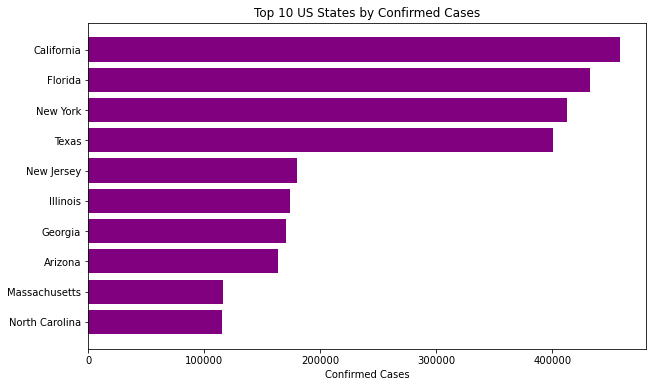

In [92]:
# Top 10 States (Confirmed Cases)
latest_date = state_ts['Date'].max()
latest_data = state_ts[state_ts['Date'] == latest_date]
top10_states = latest_data.sort_values(by="Confirmed", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10_states["Province_State"], top10_states["Confirmed"], color="purple")
plt.xlabel("Confirmed Cases")
plt.title("Top 10 US States by Confirmed Cases")
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x') 
plt.show()

Key Insights:

The top 10 countries (e.g., USA, India, Brazil) account for the majority of global confirmed cases and deaths.

There is a strong positive correlation between confirmed cases and deaths, but the death-to-case ratio varies significantly across countries.

Some countries (e.g., Mexico, Peru) show higher death rates relative to their confirmed cases, indicating possible challenges in healthcare systems or underreporting of infections.

Global case trends show multiple waves, with peaks corresponding to pandemic surges in different regions.

Active cases highlight the burden on healthcare systems at specific time periods.

